<a href="https://colab.research.google.com/github/NicoGangi5/Building_Deep_Learning_Models_with_TensorFlow/blob/main/ConvolutionalNeuralNetworkApplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from IPython.display import Markdown, display

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print(y_train[0:5])

[5 0 4 1 9]


In [ ]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [ ]:
print("number of training examples:" , x_train.shape[0])
print("number of test examples:" , x_test.shape[0])

number of training examples: 60000
number of test examples: 10000


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

# Converting a 2D Image into a 1D Vector

In [ ]:
# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


# Assigning bias and weights to null tensors

In [ ]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

## Adding Weights and Biases to input

In [ ]:
def forward(x):
    return tf.matmul(x,W) + b

# Softmax Regression

In [ ]:
# a sample softmax calculation on an input vector
vector = [10, 0.2, 8]
softmax = tf.nn.softmax(vector)
print("softmax calculation")
print(softmax.numpy())
print("verifying normalization")
print(tf.reduce_sum(softmax))
print("finding vector with largest value (label assignment)")
print("category", tf.argmax(softmax).numpy())

softmax calculation
[8.8075405e-01 4.8839214e-05 1.1919710e-01]
verifying normalization
tf.Tensor(1.0, shape=(), dtype=float32)
finding vector with largest value (label assignment)
category 0


In [ ]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [ ]:
def model(x):
    x = flatten(x)
    return activate(x)

# Cost function

In [ ]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

138155.1

## Type of optimization: Gradient Descent

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

In [ ]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss 
        #(This is automatic! Even with specialized funcctions!)
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )     
    return current_loss.numpy()

# Training batches

In [ ]:
# zeroing out weights in case you want to run this cell multiple times
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 



epoch  0 batch 500 loss: 181.6282
epoch  0 batch 1000 loss: 174.90324
end of epoch  0 loss 223756.88 accuracy 0.8141
epoch  1 batch 500 loss: 163.26254
epoch  1 batch 1000 loss: 167.5086
end of epoch  1 loss 217694.58 accuracy 0.82121664
epoch  2 batch 500 loss: 196.98743
epoch  2 batch 1000 loss: 173.62456
end of epoch  2 loss 208449.83 accuracy 0.8318
epoch  3 batch 500 loss: 192.81323
epoch  3 batch 1000 loss: 185.16005
end of epoch  3 loss 216776.08 accuracy 0.82385
epoch  4 batch 500 loss: 202.23846
epoch  4 batch 1000 loss: 168.65764
end of epoch  4 loss 213666.03 accuracy 0.82781667
epoch  5 batch 500 loss: 200.87201
epoch  5 batch 1000 loss: 172.43767
end of epoch  5 loss 207681.67 accuracy 0.83365
epoch  6 batch 500 loss: 182.25244
epoch  6 batch 1000 loss: 183.74084
end of epoch  6 loss 209199.9 accuracy 0.8330167
epoch  7 batch 500 loss: 174.16347
epoch  7 batch 1000 loss: 170.33307
end of epoch  7 loss 202929.77 accuracy 0.8388
epoch  8 batch 500 loss: 161.27478
epoch  8 ba

# Test and Plots

In [ ]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()
          
print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.83925
test accuracy 0.8327


Text(0, 0.5, 'loss')

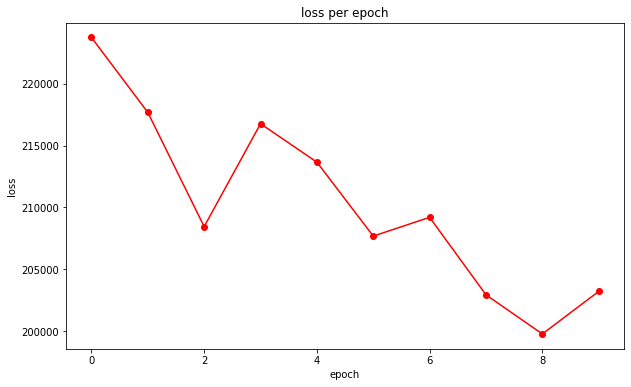

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

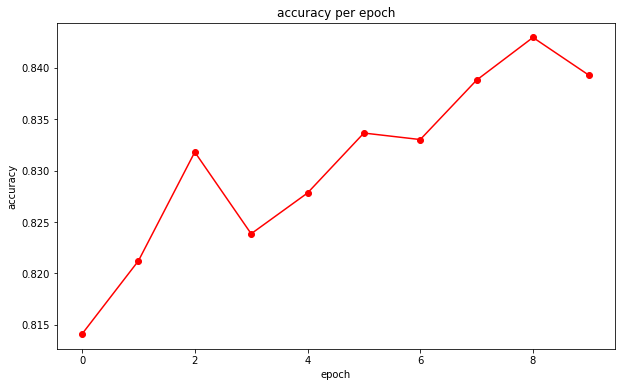

In [ ]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

# How to improve our model?

# 2nd part: Deep Learning applied on MNIST

*Initial parameters*

In [ ]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

*Converting images of the data set to tensors*

In [ ]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

In [ ]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

# Convolutional Layer 1

*Defining kernel weight and bias*

In [ ]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [ ]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

*Apply the ReLU activation Function*

In [ ]:
def h_conv1(x): return(tf.nn.relu(convolve1(x)))

*Apply the max pooling*

In [ ]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

# Convolutional Layer 2

*Defining kernel weight and bias*

In [ ]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

*Convolve image with weight tensor and add biases.*

In [ ]:
def convolve2(x): 
    return( 
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

*Apply the ReLU activation Function*

In [ ]:
def h_conv2(x):  return tf.nn.relu(convolve2(x))

*Apply the max pooling*

In [ ]:
def conv2(x):  
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

# Fully Connected Layer

*Flattening Second Layer*

In [ ]:
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

*Weights and Biases between layer 2 and 3*

In [ ]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

*Matrix Multiplication (applying weights and biases)*

In [ ]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

*Apply the ReLU activation Function*

In [ ]:
def h_fc1(x): return tf.nn.relu(fcl(x))

*Dropout Layer, Optional phase for reducing overfitting*

In [ ]:
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

*Weights and Biases*

In [ ]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

*Matrix Multiplication (applying weights and biases)*

In [ ]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

*Apply the Softmax activation Function*

In [ ]:
def y_CNN(x): return tf.nn.softmax(fc(x))

# Summary of the Deep Convolutional Neural Network
*Now is time to remember the structure of our network*

0) Input - MNIST dataset

1) Convolutional and Max-Pooling

2) Convolutional and Max-Pooling

3) Fully Connected Layer

4) Processing - Dropout

5) Readout layer - Fully Connected

6) Outputs - Classified digits

# Define functions and train the model

*Define the loss function*

In [ ]:
import numpy as np
layer4_test =[[0.9, 0.1, 0.1],[0.9, 0.1, 0.1]]
y_test=[[1.0, 0.0, 0.0],[1.0, 0.0, 0.0]]
np.mean( -np.sum(y_test * np.log(layer4_test),1))

0.10536051565782628

In [ ]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

*Define the optimizer*

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2, 
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()

In [ ]:
"""results = []
increment = 1000
for start in range(0,60000,increment):
    s = tf.slice(x_image_train,[start,0,0,0],[start+increment-1, 28, 28, 1])
    t = y_CNN(s)
    #results.append(t)
"""

'results = []\nincrement = 1000\nfor start in range(0,60000,increment):\n    s = tf.slice(x_image_train,[start,0,0,0],[start+increment-1, 28, 28, 1])\n    t = y_CNN(s)\n    #results.append(t)\n'

*Define prediction*

In [ ]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

*Define accuracy*

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

*Run session, train*

In [ ]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy)) 
            
    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )  

epoch  0 batch 50 loss: 157.1583 accuracy 0.34
epoch  0 batch 100 loss: 50.571884 accuracy 0.6
epoch  0 batch 150 loss: 28.437866 accuracy 0.74
epoch  0 batch 200 loss: 20.527294 accuracy 0.9
epoch  0 batch 250 loss: 34.547527 accuracy 0.74
epoch  0 batch 300 loss: 18.903368 accuracy 0.84
epoch  0 batch 350 loss: 18.945911 accuracy 0.86
epoch  0 batch 400 loss: 14.160229 accuracy 0.84
epoch  0 batch 450 loss: 27.010433 accuracy 0.8
epoch  0 batch 500 loss: 16.49695 accuracy 0.92
epoch  0 batch 550 loss: 20.827417 accuracy 0.88
epoch  0 batch 600 loss: 19.736347 accuracy 0.92
epoch  0 batch 650 loss: 20.747602 accuracy 0.92
epoch  0 batch 700 loss: 10.24122 accuracy 0.94
epoch  0 batch 750 loss: 32.525963 accuracy 0.84
epoch  0 batch 800 loss: 16.36348 accuracy 0.88
epoch  0 batch 850 loss: 18.923649 accuracy 0.94
epoch  0 batch 900 loss: 6.651375 accuracy 0.92
epoch  0 batch 950 loss: 16.732748 accuracy 0.88
epoch  0 batch 1000 loss: 11.316645 accuracy 0.88
epoch  0 batch 1050 loss: 5.

InvalidArgumentError: ignored

# Evaluate the model

In [ ]:
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        #accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) ) 
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))            

batch 100 accuracy 0.94
batch 200 accuracy 1.0
batch 300 accuracy 0.96
batch 400 accuracy 0.96
batch 500 accuracy 0.96
batch 600 accuracy 0.92
batch 700 accuracy 0.98
batch 800 accuracy 0.94
batch 900 accuracy 0.9
batch 1000 accuracy 0.96
batch 1100 accuracy 0.92
batch 1200 accuracy 0.98
accuracy of entire set nan


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


*Visualization*

In [ ]:
kernels = tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1])

--2020-12-10 13:34:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week2/data/utils.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/x-python]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2020-12-10 13:34:14 (615 MB/s) - ‘utils1.py’ saved [5097/5097]



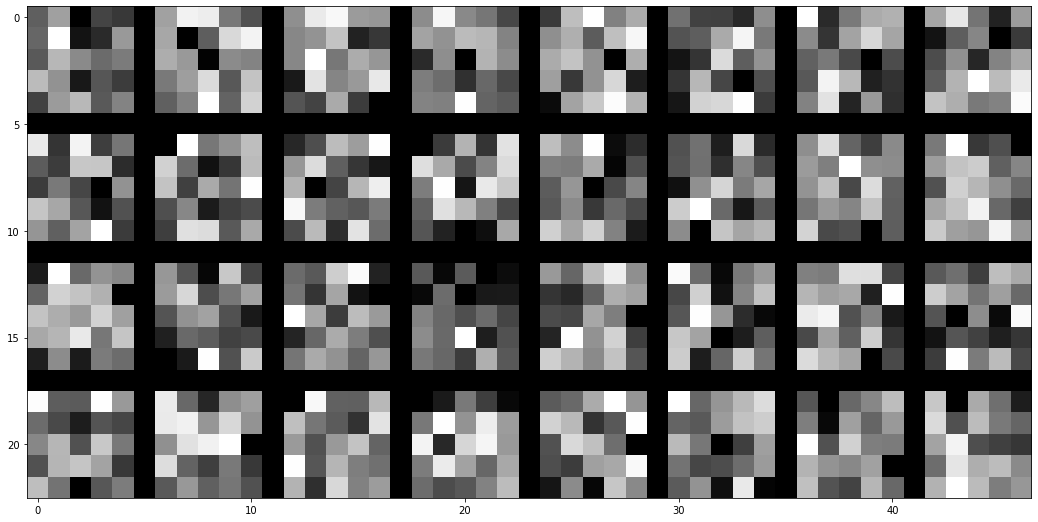

In [ ]:
!wget --output-document utils1.py https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week2/data/utils.py
import utils1
import imp
imp.reload(utils1)
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels.numpy(), img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

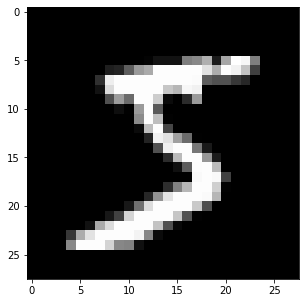

In [ ]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = [x_image_train[0]]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

In [ ]:
#ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
keep_prob=1.0
ActivatedUnits = convolve1(sampleimage)
                           
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [ ]:
#ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
ActivatedUnits = convolve2(sampleimage)
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")